In [1]:
#Required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

I have taken a classification problem of Iris dataset. The target variable being the species.

There are three classes of species type. In this task, I have extracted only 2 flower species to make it a binary classification problem.

In [2]:
#Read the csv file
data = pd.read_csv('iris.csv')
data = data[:100]
data['Species'] = np.where(data.iloc[:, -1]=='setosa', 0,1)
data.head()

,Item,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [3]:
#Transform the dataset into a matrix
data = np.asmatrix(data, dtype = 'float64')

In [4]:
#Define perceptron
#initialize num_iter,data
def perceptron(data, num_iter):
    features = data[:, :-1]
    labels = data[:, -1]
    
    # set weights to zero
    w = np.zeros(shape=(1, features.shape[1]+1))
    
    misclassified_ = [] 
  
    for epoch in range(num_iter): #Iterate over the num of iteration
        misclassified = 0
        for x, label in zip(features, labels):
            x = np.insert(x,0,1)
            y = np.dot(w, x.transpose())
            target = 1.0 if (y > 0) else 0.0 #If y>0 classify target as 1 else 0
            
            delta = (label.item(0,0) - target) # Residual
            
            if(delta): # misclassified
                misclassified += 1
                w += (delta * x)
        
        misclassified_.append(misclassified)
    return (w, misclassified_)
             
num_iter = 20
#call perceptron function
w, misclassified_ = perceptron(data, num_iter)

In [5]:
print(misclassified_)

[1, 10, 6, 2, 5, 5, 2, 5, 2, 3, 4, 5, 2, 2, 4, 3, 2, 3, 3, 3]


A property of the Perceptron is that if the dataset is linearly separable, then the algorithm is guaranteed to converge at some point!

Here, we can observe that when the iteration increases the number of misclassification rate becomes stable.

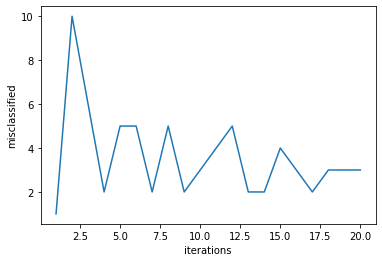

In [6]:
#plotting number of misclassified samples in each iteration
epochs = np.arange(1, num_iter+1)
plt.plot(epochs, misclassified_)
plt.xlabel('iterations')
plt.ylabel('misclassified')
plt.show()